<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S12/Assignment%20A/s12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S12/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S12


In [2]:
! git clone https://github.com/seshuad/IMagenet

Cloning into 'IMagenet'...
remote: Enumerating objects: 120594, done.
remote: Total 120594 (delta 0), reused 0 (delta 0), pack-reused 120594
Receiving objects: 100% (120594/120594), 212.68 MiB | 4.68 MiB/s, done.
Resolving deltas: 100% (1115/1115), done.
Checking out files: 100% (120206/120206), done.


# Import Libraries

In [3]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import tinyimagenet
!pip install albumentations

     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=67fc64d915a51c63eb035ef5c4e335580530d3f0c894b75ea8129ebf6d221fe5
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


# Transforms

In [0]:
from Albumentations import AlbumentationTransforms
import albumentations as A
import cv2

channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=80, min_width=80, border_mode=cv2.BORDER_REFLECT_101,always_apply=True),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      
                                      A.Rotate((-30.0, 30.0)),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.5) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])

#trainset , testset , classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

# Train and Test Split

In [0]:

dataset, class_names = tinyimagenet.alldata('IMagenet/tiny-imagenet-200/')
trainlen = int(len(dataset)*0.7)
trainset = tinyimagenet.TinyImagenetDataset(dataset[:trainlen], transform=train_transform)
testset = tinyimagenet.TinyImagenetDataset(dataset[trainlen:], transform=test_transform)

# Data Loaders

In [8]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
trainloader = torch.utils.data.DataLoader(trainset, **dataloader_args)

# test dataloader
testloader = torch.utils.data.DataLoader(testset, **dataloader_args)


CUDA Available? True


# Plotting Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([512, 3, 64, 64])
torch.Size([512])
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)


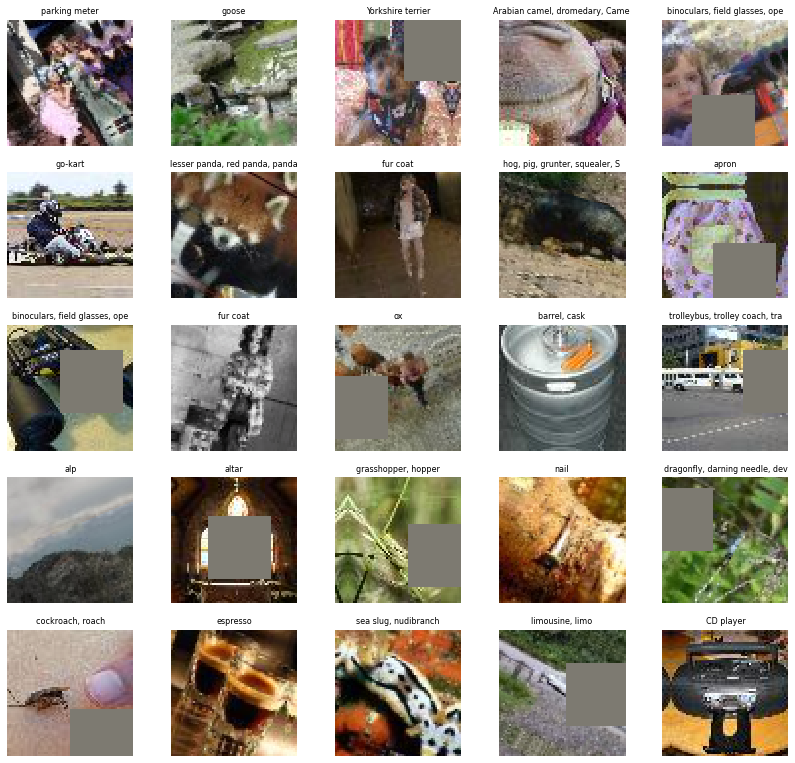

In [10]:
from __future__ import print_function
def unnormalize(img):
  img = img.cpu().numpy().astype(dtype=np.float32)
  print(img.shape)
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = len(class_names)
r, c = 5, 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.3)
for i in range(r):
  for j in range(c):
    idx = i*c + j
    ax = plt.subplot(r, c, idx+1)
    ax.set_title(class_names[labels[idx]][:30], fontdict={'fontsize': 8})
    plt.axis('off')
    ax.imshow(unnormalize(images[idx]), interpolation='none')
plt.show()

# Importing Model

In [0]:
import ResNet18

# Model parameters

In [12]:
!pip install torchsummary
from torchsummary import summary
import torchvision
import torch.nn as nn
import torch.nn.functional as F
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = ResNet18.ResNet18().to(device)
summary(net, input_size=(3, 64, 64))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
           Dropout-5           [-1, 64, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]          36,864
       BatchNorm2d-7           [-1, 64, 64, 64]             128
        BasicBlock-8           [-1, 64, 64, 64]               0
            Conv2d-9           [-1, 64, 64, 64]          36,864
      BatchNorm2d-10           [-1, 64, 64, 64]             128
          Dropout-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
       BasicBlock-14      

# Optimizer and Scheduler(OneCycle LR)



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
max_lr=1.9876452282952053
optimizer = optim.SGD(net.parameters(), lr=max_lr/10, momentum=0.9, nesterov=True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, steps_per_epoch=int(len(trainloader))+1, epochs=50, div_factor=10 )



#Importing Train and Test modules

In [0]:
import train
import test

# Training and testing our model

In [0]:
epochs = 50
last_epoch=False

for epoch in range(epochs):
  train.train(net, device, trainloader, optimizer,epoch)
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, testloader,last_epoch)
  

Epoch= 0 Loss=4.573385715484619 Batch_id=150 Accuracy=4.12: 100%|██████████| 151/151 [04:12<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 4.5031, Accuracy: 2347/33000 (7.11%)



Epoch= 1 Loss=3.9342761039733887 Batch_id=150 Accuracy=10.04: 100%|██████████| 151/151 [04:28<00:00,  1.78s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 4.1249, Accuracy: 3949/33000 (11.97%)



Epoch= 2 Loss=3.8365817070007324 Batch_id=150 Accuracy=15.84: 100%|██████████| 151/151 [04:30<00:00,  1.79s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 3.6424, Accuracy: 6202/33000 (18.79%)



Epoch= 3 Loss=3.5286033153533936 Batch_id=150 Accuracy=21.40: 100%|██████████| 151/151 [04:02<00:00,  1.61s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 3.3584, Accuracy: 7758/33000 (23.51%)



Epoch= 4 Loss=3.208564519882202 Batch_id=150 Accuracy=26.32: 100%|██████████| 151/151 [03:53<00:00,  1.55s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 3.2125, Accuracy: 8859/33000 (26.85%)



Epoch= 5 Loss=3.17092227935791 Batch_id=150 Accuracy=30.12: 100%|██████████| 151/151 [03:54<00:00,  1.55s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.9015, Accuracy: 10561/33000 (32.00%)



Epoch= 6 Loss=2.9370715618133545 Batch_id=150 Accuracy=33.74: 100%|██████████| 151/151 [03:54<00:00,  1.55s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.8482, Accuracy: 11089/33000 (33.60%)



Epoch= 7 Loss=2.573870897293091 Batch_id=150 Accuracy=36.98: 100%|██████████| 151/151 [04:09<00:00,  1.65s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.6851, Accuracy: 12103/33000 (36.68%)



Epoch= 8 Loss=2.448042154312134 Batch_id=150 Accuracy=39.86: 100%|██████████| 151/151 [04:10<00:00,  1.66s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.5868, Accuracy: 13014/33000 (39.44%)



Epoch= 9 Loss=2.213980197906494 Batch_id=150 Accuracy=42.27: 100%|██████████| 151/151 [04:12<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4370, Accuracy: 13990/33000 (42.39%)



Epoch= 10 Loss=2.3993661403656006 Batch_id=150 Accuracy=44.80: 100%|██████████| 151/151 [04:15<00:00,  1.69s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3969, Accuracy: 14139/33000 (42.85%)



Epoch= 11 Loss=2.053844451904297 Batch_id=150 Accuracy=46.82: 100%|██████████| 151/151 [04:22<00:00,  1.74s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4320, Accuracy: 14353/33000 (43.49%)



Epoch= 12 Loss=1.9622011184692383 Batch_id=150 Accuracy=48.99: 100%|██████████| 151/151 [04:08<00:00,  1.65s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3167, Accuracy: 14979/33000 (45.39%)



Epoch= 13 Loss=1.966638207435608 Batch_id=150 Accuracy=51.17: 100%|██████████| 151/151 [04:11<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3968, Accuracy: 14739/33000 (44.66%)



Epoch= 14 Loss=2.079395055770874 Batch_id=150 Accuracy=52.74: 100%|██████████| 151/151 [04:05<00:00,  1.63s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4006, Accuracy: 15007/33000 (45.48%)



Epoch= 15 Loss=1.9206942319869995 Batch_id=150 Accuracy=54.37: 100%|██████████| 151/151 [04:02<00:00,  1.60s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2416, Accuracy: 15847/33000 (48.02%)



Epoch= 16 Loss=1.5390996932983398 Batch_id=150 Accuracy=56.38: 100%|██████████| 151/151 [04:06<00:00,  1.63s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3116, Accuracy: 15701/33000 (47.58%)



Epoch= 17 Loss=1.5002999305725098 Batch_id=150 Accuracy=57.99: 100%|██████████| 151/151 [04:03<00:00,  1.61s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.1577, Accuracy: 16581/33000 (50.25%)



Epoch= 18 Loss=1.5485124588012695 Batch_id=150 Accuracy=59.38: 100%|██████████| 151/151 [03:58<00:00,  1.58s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.1788, Accuracy: 16449/33000 (49.85%)



Epoch= 19 Loss=1.5966720581054688 Batch_id=150 Accuracy=60.95: 100%|██████████| 151/151 [04:03<00:00,  1.61s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2122, Accuracy: 16542/33000 (50.13%)



Epoch= 20 Loss=1.7059156894683838 Batch_id=150 Accuracy=62.34: 100%|██████████| 151/151 [03:57<00:00,  1.57s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2305, Accuracy: 16641/33000 (50.43%)



Epoch= 21 Loss=1.3924098014831543 Batch_id=150 Accuracy=63.82: 100%|██████████| 151/151 [04:04<00:00,  1.62s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.1875, Accuracy: 16988/33000 (51.48%)



Epoch= 22 Loss=1.4658719301223755 Batch_id=150 Accuracy=65.19: 100%|██████████| 151/151 [03:56<00:00,  1.57s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2697, Accuracy: 16861/33000 (51.09%)



Epoch= 23 Loss=1.322951316833496 Batch_id=150 Accuracy=66.16: 100%|██████████| 151/151 [03:54<00:00,  1.55s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2791, Accuracy: 16906/33000 (51.23%)



Epoch= 24 Loss=1.4434332847595215 Batch_id=150 Accuracy=67.90: 100%|██████████| 151/151 [03:52<00:00,  1.54s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.2584, Accuracy: 17127/33000 (51.90%)



Epoch= 25 Loss=1.1598988771438599 Batch_id=150 Accuracy=69.00: 100%|██████████| 151/151 [03:56<00:00,  1.57s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3093, Accuracy: 16915/33000 (51.26%)



Epoch= 26 Loss=1.3170644044876099 Batch_id=150 Accuracy=70.08: 100%|██████████| 151/151 [03:51<00:00,  1.53s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3645, Accuracy: 16913/33000 (51.25%)



Epoch= 27 Loss=1.057122826576233 Batch_id=150 Accuracy=71.22: 100%|██████████| 151/151 [03:53<00:00,  1.54s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3360, Accuracy: 17201/33000 (52.12%)



Epoch= 28 Loss=1.0759899616241455 Batch_id=150 Accuracy=72.23: 100%|██████████| 151/151 [04:02<00:00,  1.61s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.3967, Accuracy: 17152/33000 (51.98%)



Epoch= 29 Loss=1.0307725667953491 Batch_id=150 Accuracy=73.49: 100%|██████████| 151/151 [04:01<00:00,  1.60s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4125, Accuracy: 17188/33000 (52.08%)



Epoch= 30 Loss=0.9225472807884216 Batch_id=150 Accuracy=74.25: 100%|██████████| 151/151 [04:01<00:00,  1.60s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4209, Accuracy: 17258/33000 (52.30%)



Epoch= 31 Loss=0.9252268075942993 Batch_id=150 Accuracy=75.63: 100%|██████████| 151/151 [03:55<00:00,  1.56s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.5846, Accuracy: 16798/33000 (50.90%)



Epoch= 32 Loss=0.8809345960617065 Batch_id=150 Accuracy=76.02: 100%|██████████| 151/151 [03:57<00:00,  1.57s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.5631, Accuracy: 17164/33000 (52.01%)



Epoch= 33 Loss=0.7705917954444885 Batch_id=150 Accuracy=77.13: 100%|██████████| 151/151 [03:57<00:00,  1.57s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.4968, Accuracy: 17285/33000 (52.38%)



Epoch= 34 Loss=0.8258855938911438 Batch_id=150 Accuracy=78.03: 100%|██████████| 151/151 [03:49<00:00,  1.52s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.5610, Accuracy: 17489/33000 (53.00%)



Epoch= 35 Loss=0.8825907111167908 Batch_id=150 Accuracy=78.71: 100%|██████████| 151/151 [04:01<00:00,  1.60s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.6294, Accuracy: 17344/33000 (52.56%)



Epoch= 36 Loss=0.7995079159736633 Batch_id=150 Accuracy=79.57: 100%|██████████| 151/151 [04:18<00:00,  1.71s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.6313, Accuracy: 17302/33000 (52.43%)



Epoch= 37 Loss=0.8196908831596375 Batch_id=150 Accuracy=80.39: 100%|██████████| 151/151 [04:11<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.7307, Accuracy: 17130/33000 (51.91%)



Epoch= 38 Loss=0.7157050371170044 Batch_id=150 Accuracy=80.73: 100%|██████████| 151/151 [04:13<00:00,  1.68s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.6371, Accuracy: 17191/33000 (52.09%)



Epoch= 39 Loss=0.6664624214172363 Batch_id=150 Accuracy=81.43: 100%|██████████| 151/151 [04:14<00:00,  1.69s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.7483, Accuracy: 17068/33000 (51.72%)



Epoch= 40 Loss=0.5077213644981384 Batch_id=150 Accuracy=82.16: 100%|██████████| 151/151 [04:12<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.7444, Accuracy: 17152/33000 (51.98%)



Epoch= 41 Loss=0.6957883238792419 Batch_id=150 Accuracy=82.46: 100%|██████████| 151/151 [04:12<00:00,  1.67s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.7458, Accuracy: 17397/33000 (52.72%)



Epoch= 42 Loss=0.7255734205245972 Batch_id=150 Accuracy=83.28: 100%|██████████| 151/151 [04:09<00:00,  1.65s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Validation set: Average loss: 2.9023, Accuracy: 17180/33000 (52.06%)



Epoch= 43 Loss=0.6095536351203918 Batch_id=100 Accuracy=83.98:  67%|██████▋   | 101/151 [02:49<01:24,  1.68s/it]